In [1]:
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install pandas
!pip install sklearn
!pip install scipy
!pip install pydotplus

# importes
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

## Intro

In this section I use the '.info' file to introduce:
    1. Subject matter & extra information.

And I use the pandas Data Frame's info function to introduce:
    1. Size of the '.csv' file.
    2. Number of rows in the dataset.
    3. The data type of each column
    4. Number of non-null values for each column.

In [2]:
# Intro

print(open("covtype.info", 'r').read())

The Forest CoverType dataset

Relevant Information :

	Predicting forest cover type from cartographic variables only
	(no remotely sensed data).  The actual forest cover type for
	a given observation (30 x 30 meter cell) was determined from
	US Forest Service (USFS) Region 2 Resource Information System 
	(RIS) data.  Independent variables were derived from data
	originally obtained from US Geological Survey (USGS) and
	USFS data.  Data is in raw form (not scaled).

	This study area includes four wilderness areas located in the
	Roosevelt National Forest of northern Colorado.  These areas
	represent forests with minimal human-caused disturbances,
	so that existing forest cover types are more a result of 
	ecological processes rather than forest management practices.




Name                                     Data Type    Measurement                       Description

Elevation                               quantitative    meters                       Elevation in meters
Aspect        

In [3]:
# Load the dataset.
data = pd.read_csv("forestCover2.csv")

In [4]:
# Print info - using Pandas info menthod
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 12 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           569412 non-null  float64
 1   Aspect                              569356 non-null  float64
 2   Slope                               551608 non-null  object 
 3   Horizontal_Distance_To_Hydrology    569203 non-null  float64
 4   Vertical_Distance_To_Hydrology      551710 non-null  float64
 5   Horizontal_Distance_To_Roadways     528923 non-null  float64
 6   Hillshade_9am                       569440 non-null  float64
 7   Hillshade_Noon                      569464 non-null  float64
 8   Hillshade_3pm                       551813 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  528848 non-null  float64
 10  Area_Type                           581012 non-null  object 
 11  Cover_Type                

## Initial Data Analysis

*Data cleaning was done logically because no special instructions were given

1. Printing first 10 rows
2. 'pandas' describe function
3. Handling NaN values

In [5]:
data.head(10)

Elevation  Aspect   Slope  Horizontal_Distance_To_Hydrology  \
0     2880.0    51.0  Slight                             258.0   
1     2930.0    56.0  Slight                             212.0   
2     3340.0   139.0  Slight                             268.0   
3        NaN   155.0  Medium                             242.0   
4     2974.0    45.0     NaN                             153.0   
5     2877.0   132.0  Slight                             300.0   
6     2966.0     NaN  Slight                             270.0   
7     2964.0    49.0  Slight                             234.0   
8     2885.0    45.0  Slight                             240.0   
9     3009.0     NaN  Slight                             247.0   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                             0.0                            510.0   
1                            -6.0                            390.0   
2                            65.0                           3180.0   
3                           118.0                           3090.0   
4                            -1.0                            391.0   
5                           -15.0                             67.0   
6                             5.0                            633.0   
7                             7.0                            573.0   
8                            56.0                            666.0   
9                            11.0                            636.0   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0          221.0             NaN          148.0   
1          220.0             NaN          151.0   
2          234.0           238.0          135.0   
3          238.0           238.0          122.0   
4          220.0           234.0            NaN   
5          230.0           237.0          140.0   
6          222.0           225.0          138.0   
7          222.0           230.0          144.0   
8          223.0           221.0          133.0   
9          228.0           219.0            NaN   

   Horizontal_Distance_To_Fire_Points          Area_Type  Cover_Type  
0                              6279.0  Wilderness_Area_1           5  
1                              6225.0  Wilderness_Area_1           5  
2                              6121.0  Wilderness_Area_1           2  
3                              6211.0  Wilderness_Area_1           2  
4                              6172.0  Wilderness_Area_1           5  
5                              6031.0  Wilderness_Area_1           2  
6                              6256.0  Wilderness_Area_1           5  
7                              6228.0  Wilderness_Area_1           5  
8                              6244.0  Wilderness_Area_1           5  
9                              6230.0  Wilderness_Area_1           5

In [6]:
data.describe(include="all")

Elevation         Aspect   Slope  \
count   569412.000000  569356.000000  551608   
unique            NaN            NaN       3   
top               NaN            NaN  Medium   
freq              NaN            NaN  218033   
mean      3279.439494     155.676863     NaN   
std        302.136887     111.911822     NaN   
min       1733.000000       0.000000     NaN   
25%       3109.000000      58.000000     NaN   
50%       3315.000000     127.000000     NaN   
75%       3491.000000     261.000000     NaN   
max       4581.000000     360.000000     NaN   

        Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      569203.000000                   551710.000000   
unique                               NaN                             NaN   
top                                  NaN                             NaN   
freq                                 NaN                             NaN   
mean                          269.431011                       46.425437   
std                           212.540581                       58.275818   
min                             0.000000                     -173.000000   
25%                           108.000000                        7.000000   
50%                           218.000000                       30.000000   
75%                           384.000000                       69.000000   
max                          1397.000000                      601.000000   

        Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                     528923.000000  569440.000000   569464.000000   
unique                              NaN            NaN             NaN   
top                                 NaN            NaN             NaN   
freq                                NaN            NaN             NaN   
mean                        2351.233522     212.146451      223.313460   
std                         1560.244864      26.765604       19.768842   
min                            0.000000       0.000000        0.000000   
25%                         1106.000000     198.000000      213.000000   
50%                         1998.000000     218.000000      226.000000   
75%                         3329.000000     231.000000      237.000000   
max                        10975.000000     254.000000      254.000000   

        Hillshade_3pm  Horizontal_Distance_To_Fire_Points          Area_Type  \
count   551813.000000                       528848.000000             581012   
unique            NaN                                 NaN                  4   
top               NaN                                 NaN  Wilderness_Area_1   
freq              NaN                                 NaN             260796   
mean       142.528915                         1979.486822                NaN   
std         38.282265                         1323.468379                NaN   
min          0.000000                            0.000000                NaN   
25%        119.000000                         1024.000000                NaN   
50%        143.000000                         1710.000000                NaN   
75%        168.000000                         2550.000000                NaN   
max        254.000000                         7173.000000                NaN   

           Cover_Type  
count   581012.000000  
unique            NaN  
top               NaN  
freq              NaN  
mean         2.051471  
std          1.396504  
min          1.000000  
25%          1.000000  
50%          2.000000  
75%          2.000000  
max          7.000000

In [7]:
# Count NaNs for each row
data.isna().sum()

Elevation                             11600
Aspect                                11656
Slope                                 29404
Horizontal_Distance_To_Hydrology      11809
Vertical_Distance_To_Hydrology        29302
Horizontal_Distance_To_Roadways       52089
Hillshade_9am                         11572
Hillshade_Noon                        11548
Hillshade_3pm                         29199
Horizontal_Distance_To_Fire_Points    52164
Area_Type                                 0
Cover_Type                                0
dtype: int64

In [8]:
# Total Rows with NaNs - without duplicates.
(data.isna().sum(axis=1) > 0).sum()

208534

Because of the massive size of the dataset and due to the performance capabilities of the computer, I would like to reach about 100K rows in the classification train (than every plot takes more than 2 minutes * 12 plots - not ) so I would rather delete the rows with the NaN values than create an artificial dataset by mean/median/mode values.

In [9]:
# Lets look at the target feature.
data["Cover_Type"].value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

In [10]:
# Drop NaN values as explained above.
data.dropna(inplace=True)

In [11]:
# Check how the drop affects the target feature.
data["Cover_Type"].value_counts()

2    181557
1    136087
3     22881
7     13090
6     11035
5      6058
4      1770
Name: Cover_Type, dtype: int64

It's seem that the drop did not affect the target distribution - than accept the drop.

In [12]:
# Another Data Manipulations

# Where Aspect = 360 or 0 is Equals, Then whrere 360 convert to 0.
data.loc[data["Aspect"] == 360, "Aspect"] = 0

# Set Absolute distance to hydrology as Sqrt((Horizontal_Distance_To_Hydrology)^2 + (Vertical_Distance_To_Hydrology)^2) - maybe this will be helpful later.
data["Absolute_Distance_To_Hydrology"] = np.sqrt(np.square(data["Horizontal_Distance_To_Hydrology"]) + np.square(data["Vertical_Distance_To_Hydrology"]))

# Set Hillshade_Avg as average of "Hillshade_9am", "Hillshade_Noon" and "Hillshade_3pm" - maybe this will be helpful later.
data["Hillshade_Avg"] = (data["Hillshade_9am"] + data["Hillshade_Noon"] + data["Hillshade_3pm"]) / 3

# Convert Categorical Columns to Numeric type.
# Converting_Dict = {"Slope" : {"Slight": 1, "Medium": 2, "Major": 3},
#                       "Area_Type": {"Wilderness_Area_1" : 1, "Wilderness_Area_2" : 2, "Wilderness_Area_3" : 3, "Wilderness_Area_4" : 4}}
# data = data.replace(Converting_Dict)
data.describe(include="all")

Elevation         Aspect   Slope  \
count   372478.000000  372478.000000  372478   
unique            NaN            NaN       3   
top               NaN            NaN  Medium   
freq              NaN            NaN  147213   
mean      3279.525408     155.570573     NaN   
std        301.994700     111.940379     NaN   
min       1782.000000       0.000000     NaN   
25%       3110.000000      58.000000     NaN   
50%       3315.000000     127.000000     NaN   
75%       3490.000000     260.000000     NaN   
max       4581.000000     359.000000     NaN   

        Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      372478.000000                   372478.000000   
unique                               NaN                             NaN   
top                                  NaN                             NaN   
freq                                 NaN                             NaN   
mean                          269.318228                       46.423544   
std                           212.107543                       58.268485   
min                             0.000000                     -173.000000   
25%                           108.000000                        7.000000   
50%                           218.000000                       30.000000   
75%                           384.000000                       69.000000   
max                          1397.000000                      601.000000   

        Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                     372478.000000  372478.000000   372478.000000   
unique                              NaN            NaN             NaN   
top                                 NaN            NaN             NaN   
freq                                NaN            NaN             NaN   
mean                        2350.223079     212.141230      223.305806   
std                         1560.431653      26.742139       19.777136   
min                            0.000000       0.000000        0.000000   
25%                         1104.000000     198.000000      213.000000   
50%                         1994.000000     218.000000      226.000000   
75%                         3328.000000     231.000000      237.000000   
max                        10975.000000     254.000000      254.000000   

        Hillshade_3pm  Horizontal_Distance_To_Fire_Points          Area_Type  \
count   372478.000000                       372478.000000             372478   
unique            NaN                                 NaN                  4   
top               NaN                                 NaN  Wilderness_Area_1   
freq              NaN                                 NaN             167211   
mean       142.523714                         1979.137283                NaN   
std         38.268906                         1325.210741                NaN   
min          0.000000                            0.000000                NaN   
25%        119.000000                         1022.000000                NaN   
50%        143.000000                         1708.000000                NaN   
75%        168.000000                         2550.000000                NaN   
max        254.000000                         7173.000000                NaN   

           Cover_Type  Absolute_Distance_To_Hydrology  Hillshade_Avg  
count   372478.000000                   372478.000000  372478.000000  
unique            NaN                             NaN            NaN  
top               NaN                             NaN            NaN  
freq              NaN                             NaN            NaN  
mean         2.048588                      275.959125     192.656917  
std          1.393701                      216.607565      14.474547  
min          1.000000                        0.000000      31.666667  
25%          1.000000                      108.558740     185.666667  
50%          2.000000            

In [13]:
# plt.figure(figsize=(24,16))
# for i in range(len(data.columns)):
#     plt.subplot(4, 3, i+1)
#     plt.xlabel(data.columns[i])
#     plt.hist(data[data.columns[i]], bins=20)
    
# plt.show()

data.to_csv("FixedDataset.csv")

## Exploratory Data Analysis

In this section I observe:
    1. Analysis of each feature - Including Visualization
    2. Additional Data Cleansing 
    3. Correlation Map

#### Show each feature with displot & violinplot

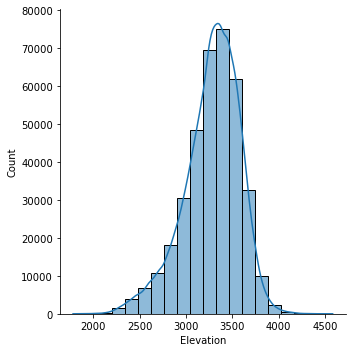

In [14]:
sns.displot(data, x="Elevation", bins=20, kde=True)

Text(0.5, 1.0, 'Elevation vs Cover_Type')

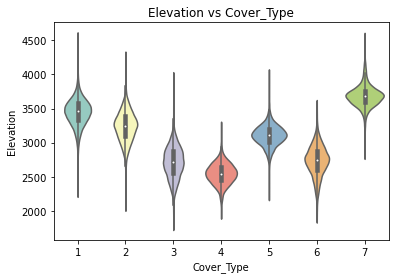

In [15]:
sns.violinplot(data=data, x="Cover_Type", y="Elevation", palette="Set3").set_title("Elevation vs Cover_Type")

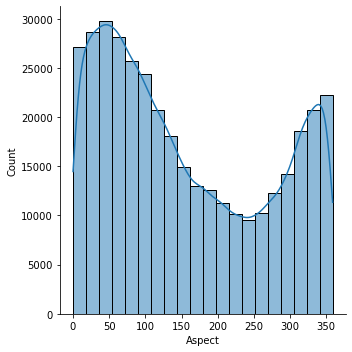

In [16]:
sns.displot(data, x="Aspect", bins=20, kde=True)

Text(0.5, 1.0, 'Aspect vs Cover_Type')

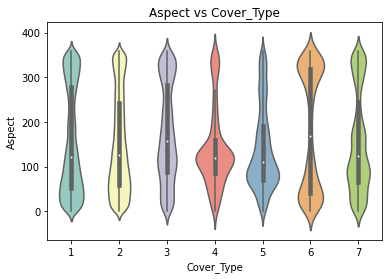

In [17]:
sns.violinplot(data=data, x="Cover_Type", y="Aspect", palette="Set3").set_title("Aspect vs Cover_Type")

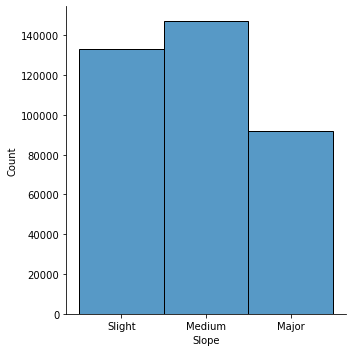

In [18]:
sns.displot(data, x="Slope", bins=3)

Text(0.5, 1.0, 'Slope vs Cover_Type')

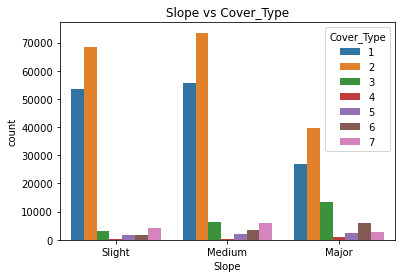

In [19]:
# sns.violinplot(data=data, x="Cover_Type", y="Slope", palette="Set3")
sns.countplot(data=data, x="Slope", hue="Cover_Type").set_title("Slope vs Cover_Type")

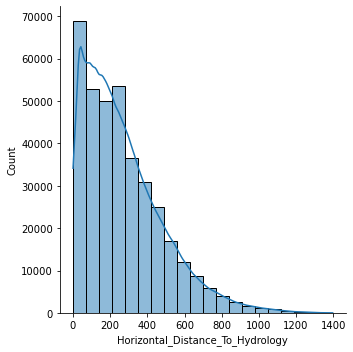

In [20]:
sns.displot(data, x="Horizontal_Distance_To_Hydrology", bins=20, kde=True)

Text(0.5, 1.0, 'Horizontal_Distance_To_Hydrology vs Cover_Type')

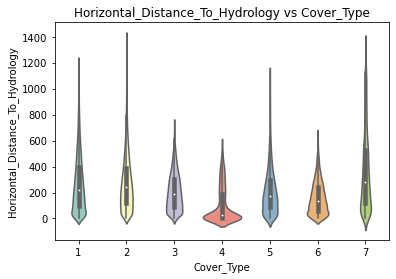

In [21]:
sns.violinplot(data=data, x="Cover_Type", y="Horizontal_Distance_To_Hydrology", palette="Set3").set_title("Horizontal_Distance_To_Hydrology vs Cover_Type")

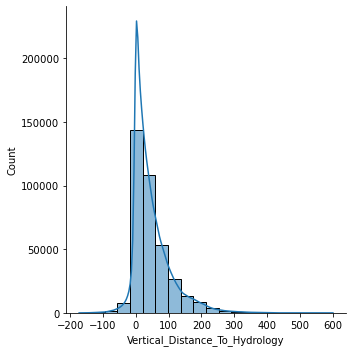

In [22]:
sns.displot(data, x="Vertical_Distance_To_Hydrology", bins=20, kde=True)

<AxesSubplot:xlabel='Cover_Type', ylabel='Vertical_Distance_To_Hydrology'>

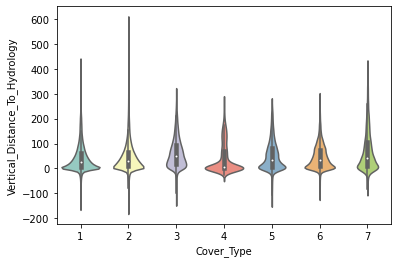

In [23]:
sns.violinplot(data=data, x="Cover_Type", y="Vertical_Distance_To_Hydrology", palette="Set3")

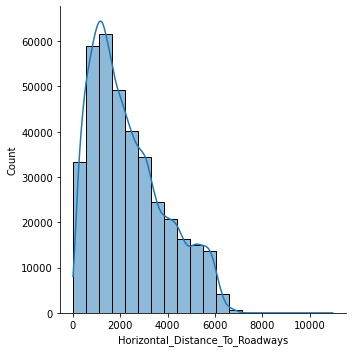

In [24]:
sns.displot(data, x="Horizontal_Distance_To_Roadways", bins=20, kde=True)

Text(0.5, 1.0, 'Horizontal_Distance_To_Roadways vs Cover_Type')

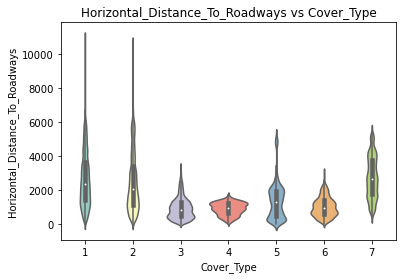

In [25]:
sns.violinplot(data=data, x="Cover_Type", y="Horizontal_Distance_To_Roadways", palette="Set3").set_title("Horizontal_Distance_To_Roadways vs Cover_Type")

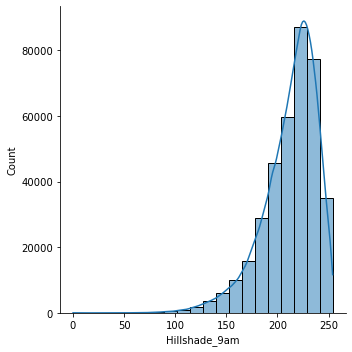

In [26]:
sns.displot(data, x="Hillshade_9am", bins=20, kde=True)

Text(0.5, 1.0, 'Hillshade_9am vs Cover_Type')

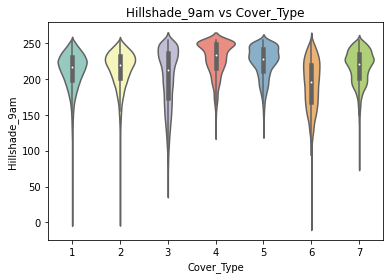

In [27]:
sns.violinplot(data=data, x="Cover_Type", y="Hillshade_9am", palette="Set3").set_title("Hillshade_9am vs Cover_Type")

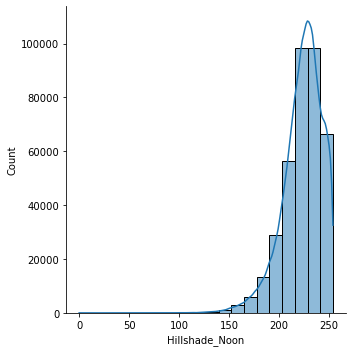

In [28]:
sns.displot(data, x="Hillshade_Noon", bins=20, kde=True)

Text(0.5, 1.0, 'Hillshade_Noon vs Cover_Type')

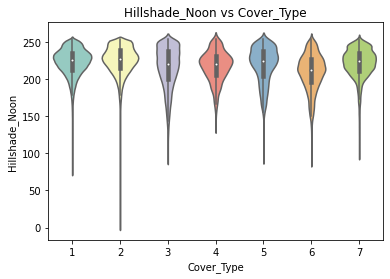

In [29]:
sns.violinplot(data=data, x="Cover_Type", y="Hillshade_Noon", palette="Set3").set_title("Hillshade_Noon vs Cover_Type")

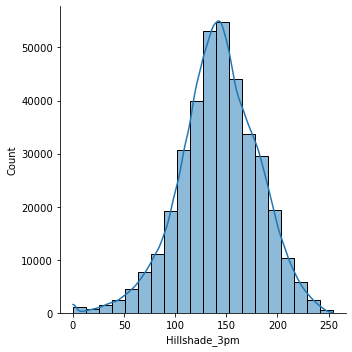

In [30]:
sns.displot(data, x="Hillshade_3pm", bins=20, kde=True)

Text(0.5, 1.0, 'Hillshade_3pm vs Cover_Type')

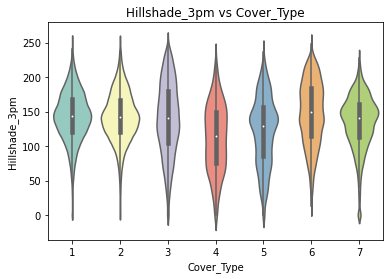

In [31]:
sns.violinplot(data=data, x="Cover_Type", y="Hillshade_3pm", palette="Set3").set_title("Hillshade_3pm vs Cover_Type")

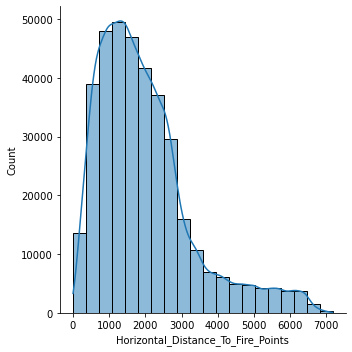

In [32]:
sns.displot(data, x="Horizontal_Distance_To_Fire_Points", bins=20, kde=True)

Text(0.5, 1.0, 'Horizontal_Distance_To_Fire_Points vs Cover_Type')

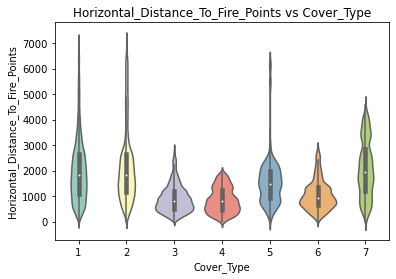

In [33]:
sns.violinplot(data=data, x="Cover_Type", y="Horizontal_Distance_To_Fire_Points", palette="Set3").set_title("Horizontal_Distance_To_Fire_Points vs Cover_Type")

<AxesSubplot:xlabel='Area_Type', ylabel='Count'>

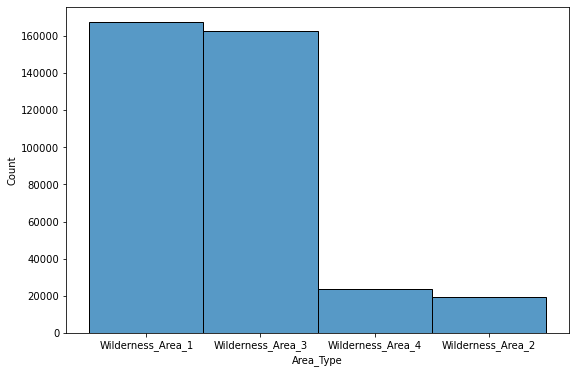

In [34]:
# Resize because the X labels to long to original size
fig, ax = plt.subplots(figsize=(9,6))
sns.histplot(ax=ax, data=data, x="Area_Type", bins=4)

Text(0.5, 1.0, 'Area_Type vs Cover_Type')

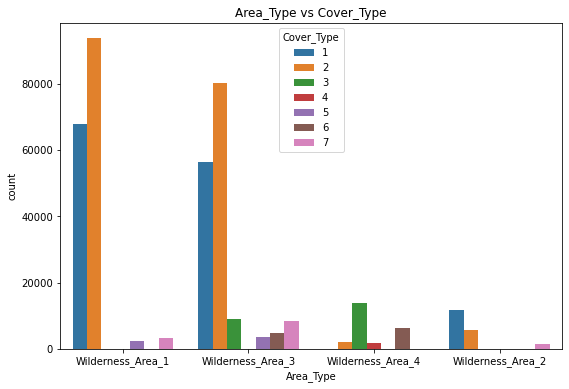

In [35]:
# Resize because the X labels to long to original size
fig, ax = plt.subplots(figsize=(9,6))
sns.countplot(ax=ax, data=data, x="Area_Type", hue="Cover_Type").set_title("Area_Type vs Cover_Type")

### Plot new features

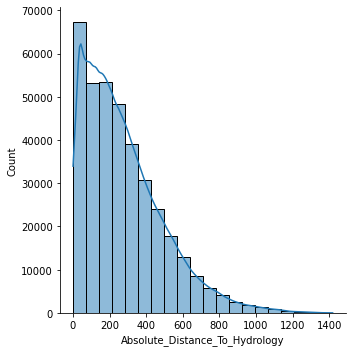

In [36]:
sns.displot(data=data, x="Absolute_Distance_To_Hydrology", bins=20, kde=True)

Text(0.5, 1.0, 'Absolute_Distance_To_Hydrology vs Cover_Type')

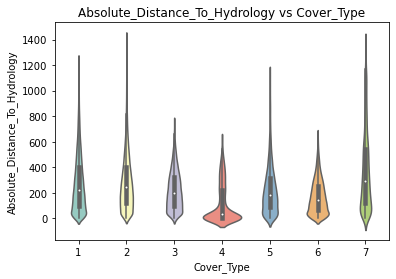

In [37]:
sns.violinplot(data=data, x="Cover_Type", y="Absolute_Distance_To_Hydrology", palette="Set3").set_title("Absolute_Distance_To_Hydrology vs Cover_Type")

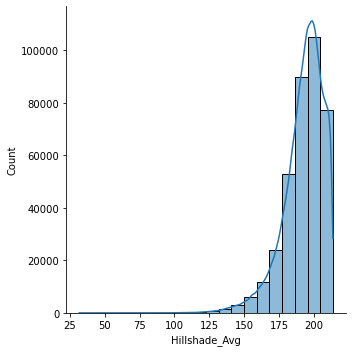

In [38]:
sns.displot(data=data, x="Hillshade_Avg", bins=20, kde=True)

Text(0.5, 1.0, 'Hillshade_Avg vs Cover_Type')

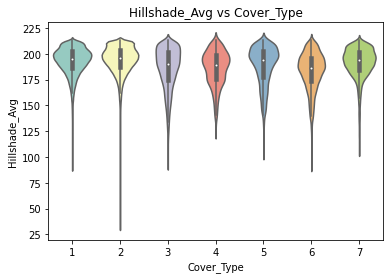

In [39]:
sns.violinplot(data=data, x="Cover_Type", y="Hillshade_Avg", palette="Set3").set_title("Hillshade_Avg vs Cover_Type")

### Pairplot of all features

In [65]:
data["Slope"].replace({"Slight": 1, "Medium": 2, "Major": 3}, inplace=True)
data["Area_Type"].replace({"Wilderness_Area_1": 1, "Wilderness_Area_2": 2, "Wilderness_Area_3": 3, "Wilderness_Area_4": 4}, inplace=True)

(18623, 14)


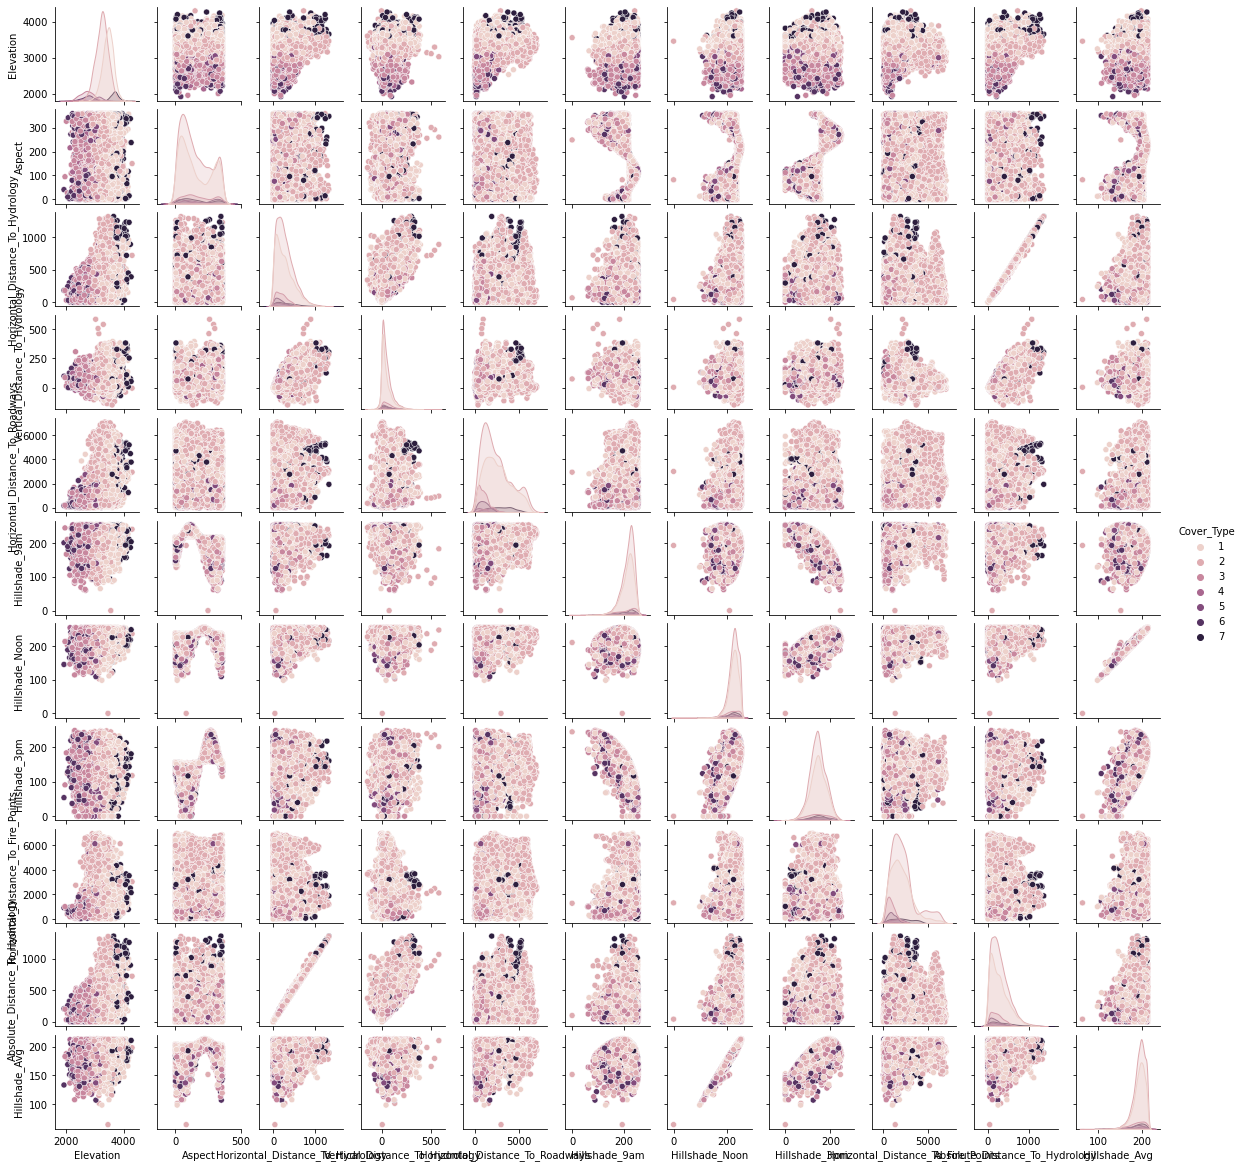

In [40]:
# Split for the pair plot for faster response - You can try bigger value than 0.05 - Not Recommended (;
y = data["Cover_Type"]
X = data.drop(["Cover_Type"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.05, random_state=1)
train = pd.concat([X_train,y_train],axis=1)
print(train.shape)
# It takes above a minute...
sns.pairplot(data=train, hue='Cover_Type', height=1.5)

In [136]:
# Drop suspects values
data = data[data.Vertical_Distance_To_Hydrology < 450]
data = data[data.Hillshade_9am > 50]
data = data[data.Hillshade_Noon > 70]
data = data[data.Hillshade_3pm != 0]
data = data[data.Horizontal_Distance_To_Roadways < 9000]
# Calculate again the new 2 features
data["Absolute_Distance_To_Hydrology"] = np.sqrt(np.square(data["Horizontal_Distance_To_Hydrology"]) + np.square(data["Vertical_Distance_To_Hydrology"]))
data["Hillshade_Avg"] = (data["Hillshade_9am"] + data["Hillshade_Noon"] + data["Hillshade_3pm"]) / 3

(18618, 14)


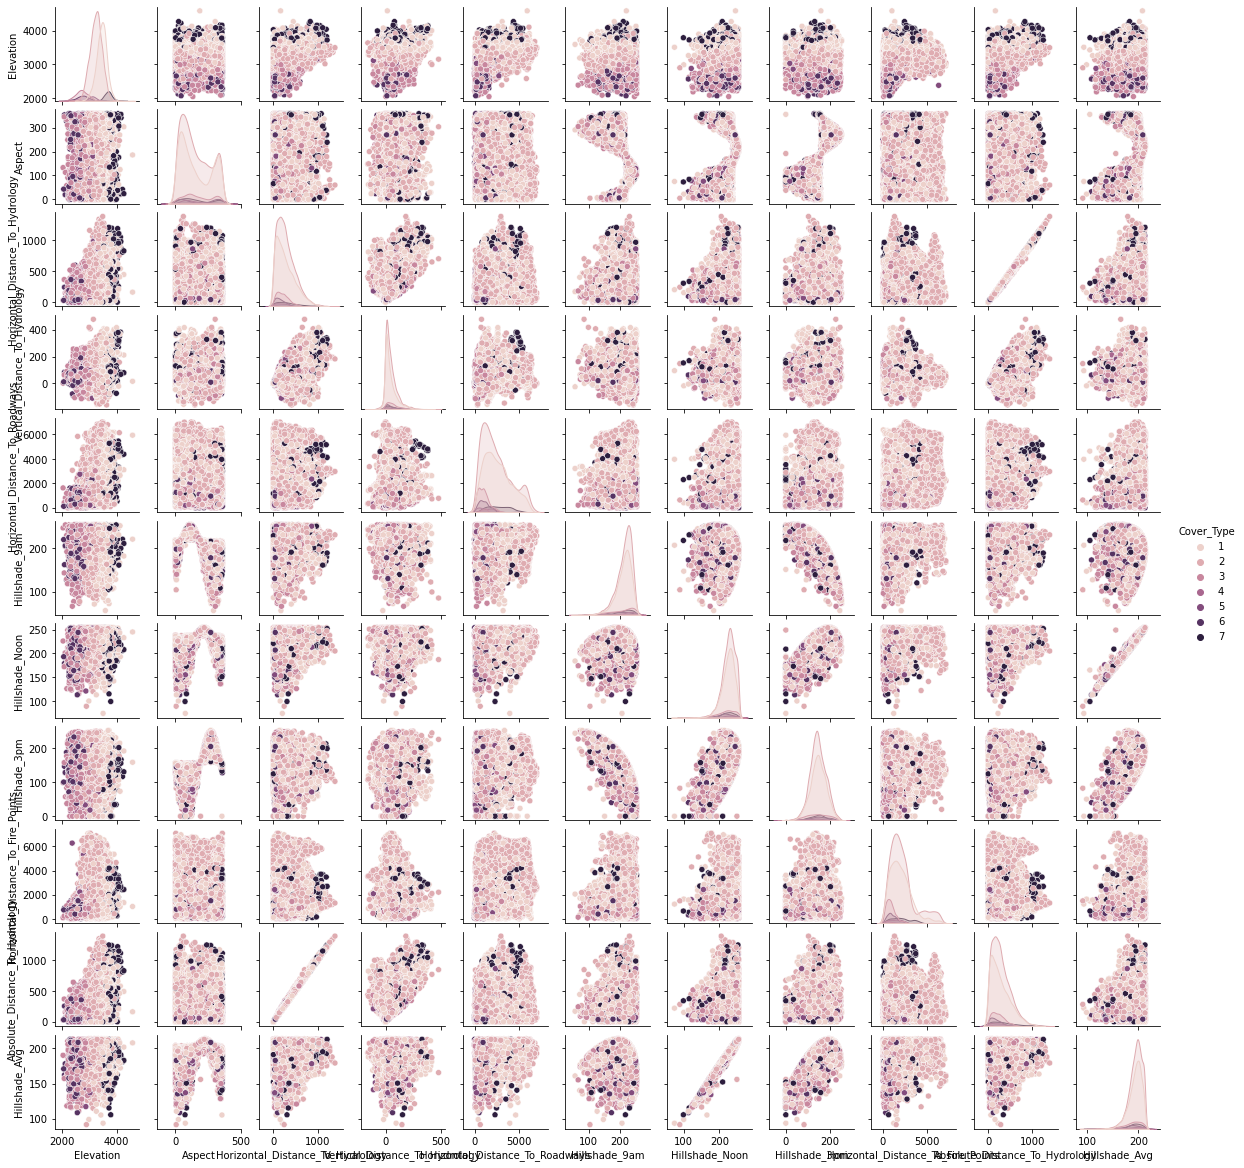

In [42]:
# Print Pairplot again.
y = data["Cover_Type"]
X = data.drop(["Cover_Type"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.05, random_state=1)
train = pd.concat([X_train,y_train],axis=1)
print(train.shape)
# It takes above a minute...
sns.pairplot(data=train, hue='Cover_Type', height=1.5)

<AxesSubplot:>

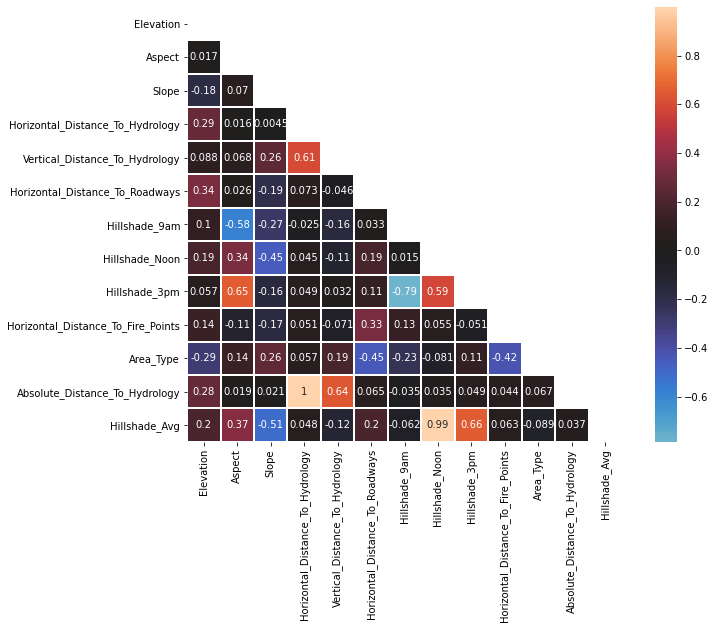

In [79]:
# Correlation Plot
f, ax = plt.subplots(figsize=(12, 8))
corr = data.drop(["Cover_Type"], axis=1).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, center=0, linewidths=1, square=True, annot=True, ax=ax)

#### Now we can see a overfitting of the new features (Absolute_Distance_To_Hydrology & Horizontal_Distance_To_Hydrology, Hillshade_Avg & Hillshade_Noon), than it not recommended to be used to the classification (Intended to use only these two data or a classification that relies on these two data).

## Visualization for relevant and interesting features

Get Highly Correlated Values and plot them into 2d scatterplot.

In [70]:
#Highly Correlated Values 
cols = data.drop(["Cover_Type"], axis=1).columns

threshold = 0.5 #50% correlation threshold
overffiting_threshold = 0.95 # over 95% correlation = overfitting - than not use

#searching for highly correlated continuous features  
corr_list = []
for i in range(0, 13):
    for j in range(i+1, 13): #avoid repetition
        if (corr.iloc[i, j] >= threshold and corr.iloc[i,j] < 0.95) or (
            corr.iloc[i,j] > -0.95 and corr.iloc[i,j] <= -threshold):
            corr_list.append([corr.iloc[i, j], i, j]) #store correlation and columns index

#show higher first            
s_corr_list = sorted(corr_list, key=lambda x: -abs(x[0]))

for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))

Hillshade_9am and Hillshade_3pm = -0.78
Hillshade_3pm and Hillshade_Avg = 0.67
Aspect and Hillshade_3pm = 0.65
Vertical_Distance_To_Hydrology and Absolute_Distance_To_Hydrology = 0.64
Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology = 0.61
Hillshade_Noon and Hillshade_3pm = 0.60
Aspect and Hillshade_9am = -0.58
Slope and Hillshade_Avg = -0.51


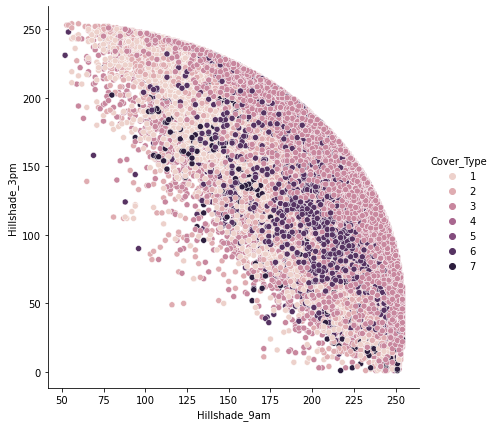

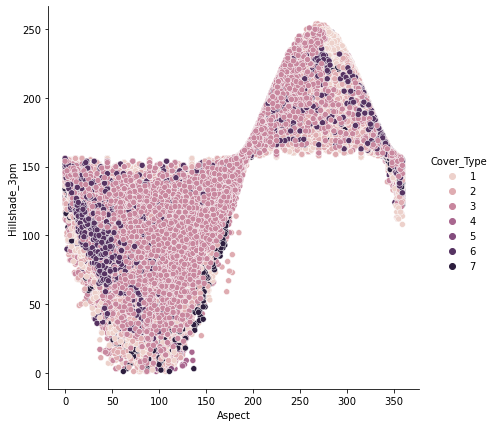

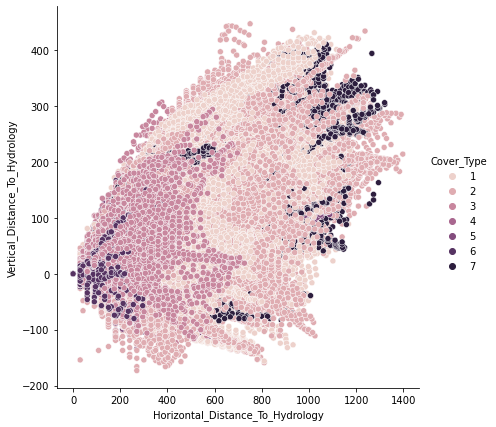

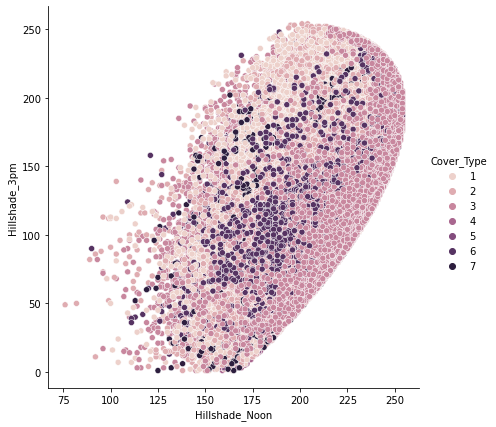

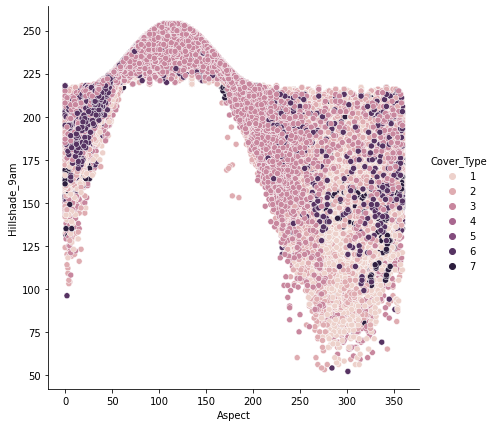

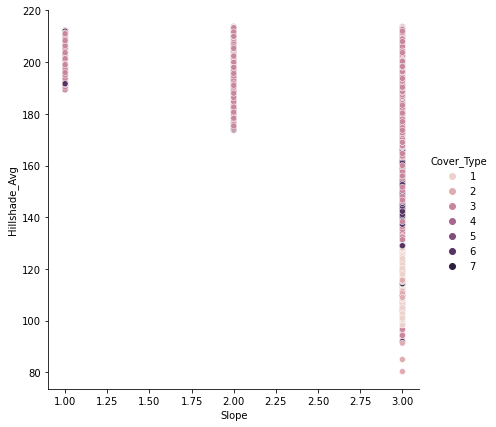

In [88]:
# Pairplot of target variable with highly correlated dependent variables 
# Without comparsion of the new features בompared to those who created them
not_include = [("Hillshade_3pm", "Hillshade_Avg"), ("Vertical_Distance_To_Hydrology", "Absolute_Distance_To_Hydrology")]
for v,i,j in s_corr_list:
    if (cols[i],cols[j]) not in not_include:
        sns.pairplot(data, hue='Cover_Type', height=6, x_vars=cols[i],y_vars=cols[j])

# Classiication Model

### Gaussian Naïve Bayes

##### All plot seem that have the same effect, than I choose to use "Aspect" & "Hillsahde_3pm"

In [92]:
y = data["Cover_Type"]
X = data.drop(["Cover_Type"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [105]:
model = GaussianNB() 
# Choosen Values = "Aspect" & "Hillshade_3pm".
model.fit(X_train[["Aspect", "Hillshade_3pm"]], y_train)

y_model = model.predict(X_test[["Aspect", "Hillshade_3pm"]])
ypred = pd.Series(y_test,name="prediction")
predicted = pd.concat([X_test.reset_index(),y_test.reset_index(),ypred],axis=1)
print(metrics.accuracy_score(y_test, y_model))

0.4884384505639452


In [108]:
def bayes_plot(df, to_use_features, model="gnb",spread=30):
    df.dropna()
    colors = 'seismic'
    col1 = to_use_features[0]
    col2 = to_use_features[1]
    target = df.columns[-3]
    sns.scatterplot(data=df, x=col1, y=col2,hue=target)
    plt.show()
    y = df[target]  # Target variable
    X = df[[col1, col2]]# df.drop(target, axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,random_state=1)  # 70% training and 30% test

    clf = GaussianNB()
    if (model != "gnb"):
        clf = DecisionTreeClassifier(max_depth=model)
    clf = clf.fit(X_train, y_train)
    
    # Train Classifer
    
    prob = len(clf.classes_) == 7

    # Predict the response for test dataset

    y_pred = clf.predict(X_test)
    print(metrics.classification_report(y_test, y_pred))

    hueorder = clf.classes_
    def numify(val):
        return np.where(clf.classes_ == val)[0]

    Y = y.apply(numify)
    x_min, x_max = X.loc[:, col1].min() - 1, X.loc[:, col1].max() + 1
    y_min, y_max = X.loc[:, col2].min() - 1, X.loc[:, col2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                         np.arange(y_min, y_max, 0.2))
    
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    if prob:

        Z = Z[:,1]-Z[:,0]
    else:
        colors = "Set1"
        Z = np.argmax(Z, axis=1)


    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=colors, alpha=0.5)
#     plt.colorbar()
    if not prob:
        plt.clim(0,len(clf.classes_)+3)
    sns.scatterplot(data=df[::spread], x=col1, y=col2, hue=target, hue_order=hueorder,palette=colors)
    fig = plt.gcf()
    fig.set_size_inches(12, 8)
    plt.show()

C:\Users\Yaniv\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


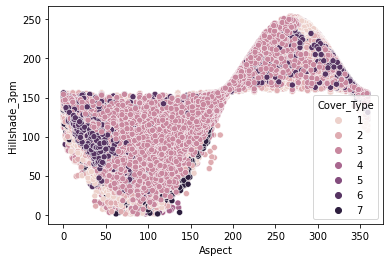

True


C:\Users\Yaniv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00     67791
           2       0.49      1.00      0.66     90571
           3       0.23      0.02      0.03     11469
           4       0.00      0.00      0.00       901
           5       0.00      0.00      0.00      2982
           6       0.00      0.00      0.00      5587
           7       0.00      0.00      0.00      6444

    accuracy                           0.49    185745
   macro avg       0.10      0.14      0.10    185745
weighted avg       0.25      0.49      0.32    185745



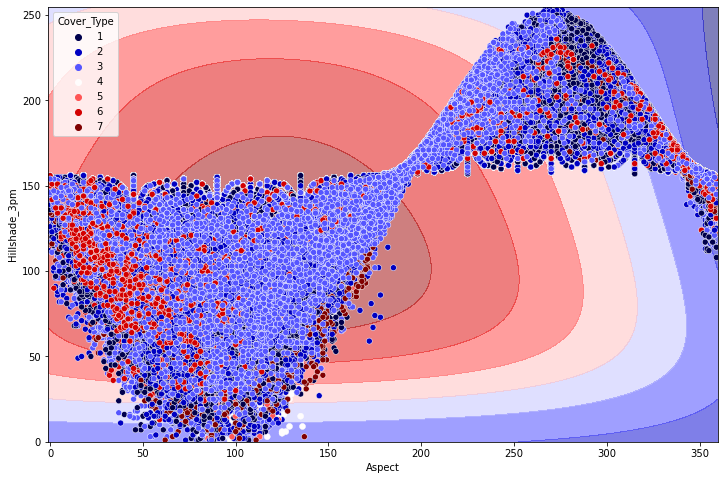

In [111]:
bayes_plot(data, ["Aspect", "Hillshade_3pm"], spread=1)

### Desicion Tree

In [130]:
# Original Data with basic dropna & replacements
original_data = pd.read_csv("forestCover2.csv")
original_data.dropna(inplace=True)
original_data["Slope"].replace({"Slight": 1, "Medium": 2, "Major": 3}, inplace=True)
original_data["Area_Type"].replace({"Wilderness_Area_1": 1, "Wilderness_Area_2": 2, "Wilderness_Area_3": 3, "Wilderness_Area_4": 4}, inplace=True)
original_y = original_data["Cover_Type"]
original_X = original_data.drop(["Cover_Type"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(original_X, original_y, test_size=0.3, random_state=1)

model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_model = model.predict(X_test)
ypred = pd.Series(y_test,name="prediction")
predicted = pd.concat([X_test.reset_index(),y_test.reset_index(),ypred],axis=1)
print(predicted["prediction"].value_counts())
print("Original Data Accuracy : {}".format(metrics.accuracy_score(y_test, y_model)))

2.0    54511
1.0    40874
3.0     6849
7.0     3859
6.0     3326
5.0     1799
4.0      526
Name: prediction, dtype: int64
Original Data Accuracy : 0.7742339633447881


In [139]:
# Manipulated Data
manipulated_y = data["Cover_Type"]
manipulated_X = data.drop(["Cover_Type"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_model = model.predict(X_test)
ypred = pd.Series(y_test,name="prediction")
predicted = pd.concat([X_test.reset_index(),y_test.reset_index(),ypred],axis=1)
# print(predicted)
print("Manipulated Data Accuracy : {}".format(metrics.accuracy_score(y_test, y_model)))

Manipulated Data Accuracy : 0.7702405627787199
